## Consider spring-mass-damper system and complete the following tasks:

1. design PD-controller that tracks time varying reference states i.e. $[x \dot{x} ]^T$ as closely as possible. Test your controller on different trajectories;
2. find $k_p$ and $k_d$ such that there are no oscillations and no overshoot in the system. Prove it on step input signal;
3. prove that spring-mass-damper system is stable with PD-controller for $k_p$ and $k_d$ of your choice.
4. implement PI/PID controller and compare it to PD controller.

## Spring-mass-dumping system

Given an ODE:

$$m\ddot x+b_{1}\dot x + k x= F$$

find its state space representation:

$$\dot x = Ax + b$$

In [14]:
#1
m = 0.8
b = 0.9
k = 0.3

kp = 1 #0.8
kd = 0.8 # TODO - change
#2
m = 0.8
b = 0.1
k = 0.3
#3

m = 0.1
b = 0.7
k = 0.6
# # me
m = 0.1
k = 0.1
b = 0.2

x_desired = 1
x_dot_desired = 0

kp = 16 #0.8
kd = 19 # TODO - change

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

n = 3                     
a = np.array([m, b, k])     
a_norm = a[1:] / m     
A = np.zeros((n-1, n-1))  
A[0 , 0:] = -a_norm
A[1:, 0:(n-2)] = np.eye(n-2)

B = np.zeros(A.shape[0])
B[0] = 1/m

# print("Our matrix A:", "Our matrix B:")
# print(A, B)

P control:

$$u = k_p(x^* -x)$$

PD control (derivated P control):

$$u = k_d(\dot{x^*} - \dot{x}) + k_p(x^* - x)$$
$$e = x^* - x \text{(control error)}$$
$$u = k_d \dot{e} + k_p e$$

$$\dot{x} = Ax + Bu$$

In [15]:
B

array([10.,  0.])

In [16]:

def pd_control(x, t):
    e = x_desired - x[1]
    e_dot = x_dot_desired - x[0]
    u = kp * e + kp * e_dot
    return np.dot(A, x) + np.dot(B, u)


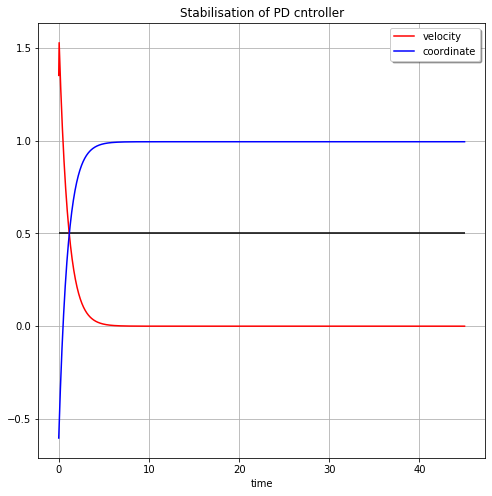

In [17]:
time = np.linspace(0, 45, 1000)   
x0 = (np.random.random(2)) - 1
x0[0] += 2
res = odeint(pd_control, x0, time).T

fig = plt.figure(figsize=(8, 8))
plt.title("Stabilisation of PD cntroller")
plt.xlabel("time")
plt.hlines(0.5, 0, 45)
plt.plot(time, res[0], "r-", label="velocity")
plt.plot(time, res[1], "b-", label="coordinate")
plt.grid()
plt.legend(shadow=True)
plt.savefig("nkt3.png")

In [18]:
first = np.array([0] + list(res[0]))
a = list(res[0])
a.append(0)
second = np.array(a)

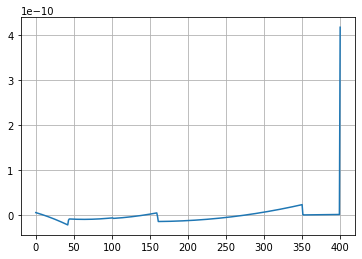

In [19]:
plt.plot((second - first)[600:])
plt.grid()

## PID control 

TODO: add a new term - sum of all previous errors

[Wiki](https://en.wikipedia.org/wiki/PID_controller)

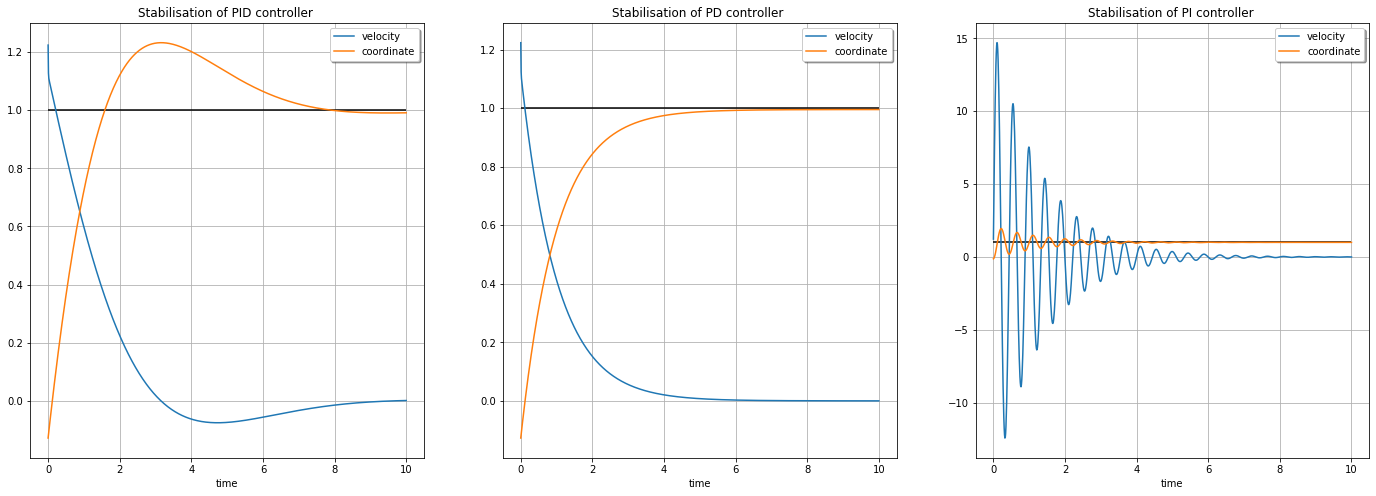

In [25]:

ki = 10
kp = 20 #20
kd = 20
sum_error = 0
prev_t = 0

def pid_control(x, t):
    
    e = x_desired - x[1]
    e_dot = x_dot_desired - x[0]
    global sum_error
    global prev_t
    sum_error += e*(t - prev_t)
    prev_t = t
    u = kp * e + kd * e_dot + ki * sum_error

    return np.dot(A, x) + np.dot(B, u)
    

time = np.linspace(0, 10, 1000)   
x0 = (np.random.random(2)) - 1
x0[0] += 2
res = odeint(pid_control, x0, time)
res = res.T

fig = plt.figure(figsize=(24, 8))
plt.subplot(131)

plt.title("Stabilisation of PID controller ")
plt.xlabel("time")
# plt.ylim(-1, 2)
# plt.xlim(0, 1)

plt.hlines(x_desired, 0, 10)
plt.plot(time, res[0],label="velocity")
plt.plot(time, res[1],label="coordinate")
plt.grid()
plt.legend(shadow=True)


plt.subplot(132)
ki = 0
res = odeint(pid_control, x0, time).T

plt.title("Stabilisation of PD controller ")
plt.xlabel("time")
# plt.ylim(-1, 2)
# plt.xlim(0, 1)
plt.hlines(x_desired, 0, 10)
plt.plot(time, res[0],label="velocity")
plt.plot(time, res[1],label="coordinate")
plt.grid()
plt.legend(shadow=True)

plt.subplot(133)

sum_error = 0
prev_t = 0
ki = 10
kd = 0

res = odeint(pid_control, x0, time).T
plt.title("Stabilisation of PI controller ")
plt.xlabel("time")
# plt.ylim(-1, 2)
# plt.xlim(0, 1)

plt.hlines(x_desired, 0, 10)
plt.plot(time, res[0],label="velocity")
plt.plot(time, res[1],label="coordinate")
plt.grid()
plt.legend(shadow=True)
plt.savefig("total_pid.png")

## Bode plot for pd control

[Bode plots and stability](https://www.electrical4u.com/bode-plot-gain-margin-phase-margin/)

In [143]:
from scipy import signal


num = [0, 0, kp*x_desired + kd*x_dot_desired]
den = [m, (b+kd), kp+k]
res = signal.TransferFunction(num, den)

w, mag, phase = signal.bode(res, np.arange(0.1, 1000, 0.01).tolist())


/home/alina/.local/lib/python3.7/site-packages/scipy/signal/filter_design.py:1619: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


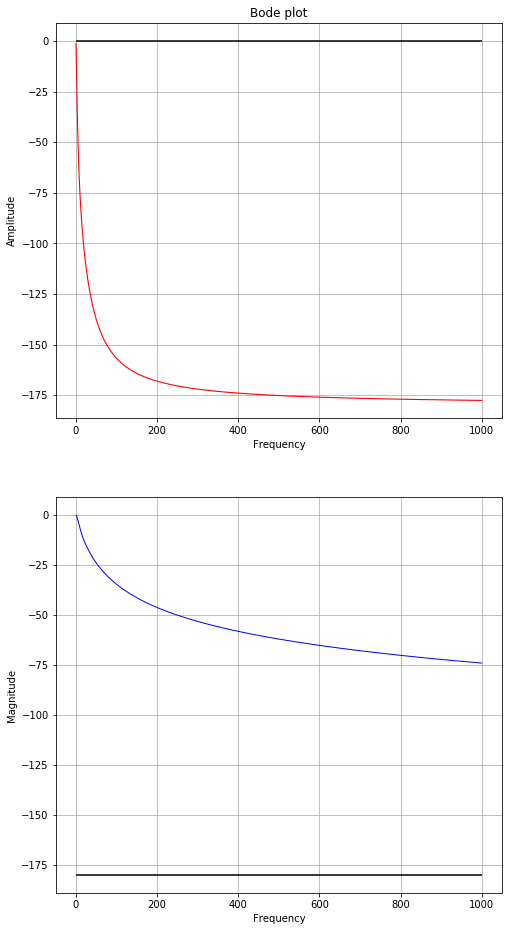

In [144]:


plt.figure(figsize=(8, 16))

plt.subplot(211)
plt.title("Bode plot")

plt.plot(w, phase, color="red", linewidth="1.1")
plt.xlabel ("Frequency")
plt.ylabel ("Amplitude")
plt.hlines(0, 0, 1000)
plt.grid()

plt.subplot(212)
plt.plot(w, mag, color="blue", linewidth="1")
plt.xlabel ("Frequency")
plt.ylabel ("Magnitude")
plt.hlines(-180, 0, 1000)
plt.grid()



plt.savefig("ass2.png")

In [54]:
197**2 - 166*4

38145

In [55]:
(38145)**0.5

195.3074499347119